---
title: Chinese NLP datasets
collapse: 3
parent: 2023 / 03 (Asia)
---

In this notebook, I build the dataset of news articles in Chinese.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#  Setup

## Usual packages

In [2]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm.auto import tqdm
from matplotlib import pyplot as plt
import seaborn  as sns
import yaml

import data_accessor.pyarrow as dap
print('finish')

finish


In [3]:
import pandas as pd
from pathlib import Path
import cfm_datatree as io

In [15]:
dastart='20081101'
daend='20230601'
POOLS = ['CFM_AMER']
path = Path('/mnt/research-live/equity/reference/equity_data/sa_research/current')
mret = {p: io.load(path /p / 'research_data', selection='markowitz_neutral_vol_financed_total_returns',
                       dastart=dastart, daend=daend).dropna(how='all', axis=1)
            for p in POOLS}

In [16]:
df_returns=mret['CFM_AMER']

In [17]:
df_returns.to_parquet('/mnt/research-live/user/yzhong/bloomberg_news_returns_AMER.parquet')

## Bloomberg news

### Extract and write data

Extracting all the Bloomberg articles take about 20 mins. There are 3.8 millions articles.

In [2]:
import sys
print(sys.path)

['/home/yzhong/notebooks/getting_started', '/mnt/research-live/platform-kernels/platform-current/lib/python38.zip', '/mnt/research-live/platform-kernels/platform-current/lib/python3.8', '/mnt/research-live/platform-kernels/platform-current/lib/python3.8/lib-dynload', '', '/home/yzhong/.local/lib/python3.8/site-packages', '/mnt/research-live/platform-kernels/platform-current/lib/python3.8/site-packages', '/mnt/research-live/platform-kernels/platform-current/lib/python3.8/site-packages/Crowd-1.0.1-py3.8.egg', '/mnt/research-live/platform-kernels/platform-current/lib/python3.8/site-packages/avro-1.10.2-py3.8.egg', '/mnt/research-live/platform-kernels/platform-current/lib/python3.8/site-packages/cargho_tools-0.2.6-py3.8.egg', '/mnt/research-live/platform-kernels/platform-current/lib/python3.8/site-packages/cfm_authorizations-1.0.0-py3.8.egg', '/mnt/research-live/platform-kernels/platform-current/lib/python3.8/site-packages/cfm_plotly-1.1.0-py3.8.egg', '/mnt/research-live/platform-kernels/p

In [5]:
from src.extract_chinese_data import get_bloomberg_chinese_news, get_bloomberg_english_news
from src.bloomberg_news import get_bloomberg_news_level_single_stock,get_bloomberg_data_one_tag_for_classification, get_bloomberg_news_level_all_stock

In [10]:
%%time
df_b = get_bloomberg_news_level_single_stock(date="2023/*/*")

CPU times: user 498 ms, sys: 325 ms, total: 823 ms
Wall time: 1min 26s


In [26]:
df_b =get_bloomberg_data_one_tag_for_classification(
    'MMN',
    ['MMN'],
    single_stock_news=True,
    date="*/*/*",
    save=True,
    path='/mnt/research-live/user/yzhong/Single_level_stock_MMN'
    )

In [23]:
df_b.MMN.value_counts()

False    2361761
True          47
Name: MMN, dtype: int64

In [21]:
df_b.MMN.value_counts()

False    1612202
True         370
Name: MMN, dtype: int64

In [11]:
year=str(2023)
filename = f'Single_stock_news_{year}.parquet'
filepath = os.path.join('/mnt/research-live/user/yzhong/Single_level_stock', filename)
df_b.to_parquet(filepath)

In [6]:
# Create the year directory
if not os.path.exists("/mnt/research-live/user/yzhong/All_level_stock"):
    os.makedirs("/mnt/research-live/user/yzhong/All_level_stock")
for year in range(2008, 2023):
    year=str(year)

# Load the data for the entire year
    df_b = get_bloomberg_news_level_all_stock(date=f"{year}/*/*")

# Save the data to a parquet file in the year directory
    filename = f'All_stock_news_{year}.parquet'
    filepath = os.path.join('/mnt/research-live/user/yzhong/All_level_stock', filename)
    df_b.to_parquet(filepath)


In [4]:
df_b.to_parquet('/mnt/research-live/user/yzhong/bloomberg_news_english_single_stock_topic_2022.parquet')

In [4]:
%%time
df_b = get_bloomberg_chinese_news(date="*/*/*")

CPU times: user 8.2 s, sys: 7.06 s, total: 15.3 s
Wall time: 38min 56s


In [ ]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({
    'date': pd.date_range('2015-04-01', '2015-05-31'),
    'col1': [0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1],
    'col2': [0.3, -0.5, -0.7, -0.9, -1.1, -1.3, -1.5, -1.7, -1.9, -2.1, 2.3, 2.5, 2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7, 5.9, 6.1, 6.3],
})

# set the date index
df.set_index('date', inplace=True)

# set the desired date as a datetime object
desired_date = pd.to_datetime('2015-04-30')

# select the columns that satisfy the condition using boolean indexing and loc
before_date_cols = list(df.loc[df.index < desired_date, (df < 0).all()].columns)
after_date_cols = list(df.loc[df.index >= desired_date, (df > 0).all()].columns)

print('Columns with all values <0 before 2015-04-30:', before_date_cols)
print('Columns with all values >0 after 2015-04-30:', after_date_cols)


In [ ]:
get_period()

In [ ]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({
    'date': pd.date_range('2015-04-01', '2015-05-31'),
    'col1': [0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1],
    'col2': [0.3, -0.5, -0.7, -0.9, -1.1, -1.3, -1.5, -1.7, -1.9, -2.1, 2.3, 2.5, 2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7, 5.9, 6.1, 6.3],
})

# set the date index
df.set_index('date', inplace=True)

# set the desired date as a datetime object
desired_date = pd.to_datetime('2015-04-30')

# select the columns that satisfy both conditions using boolean indexing and loc
cols = list(df.loc[(df.index < desired_date) & (df < 0).all() | (df.index >= desired_date) & (df > 0).all()].columns)

print('Columns with all values <0 before 2015-04-30 or all values >0 after 2015-04-30:', cols)


In [ ]:
df.loc[df.index < desired_date, (df < 0).all()]

In [5]:
df_b.to_parquet('/mnt/research-live/user/yzhong/bloomberg_news_chinese_eqt.parquet')

In [11]:
import os
import pandas as pd

# Create a folder to store the data
if not os.path.exists("Single_level_stock"):
    os.makedirs("Single_level_stock")

# Loop through years and months to download the data
for year in range(2011, 2023):
    for month in range(1, 13):
        # Format the year and month with leading zeros
        year_str = str(year)
        month_str = str(month).zfill(2)
        
        # Download the data for the given year and month
        date_str = f"{year_str}/{month_str}/*"
        df_b = get_bloomberg_chinese_news(date=date_str)
        
        # Save the data as a Parquet file
        file_name = f"bloomberg_news_chinese_{year_str}_{month_str}.parquet"
        file_path = os.path.join("Chinese_news_data", file_name)
        df_b.to_parquet(file_path)

In [3]:
import os
import pandas as pd

# Create the top-level directory for the English news data
if not os.path.exists("/mnt/live/user/yzhong/English_news_data"):
    os.mkdir("/mnt/live/user/yzhong/English_news_data")

for year in range(2011, 2023):
    year_str = str(year)

    # Create the year directory
    year_dir = os.path.join("/mnt/live/user/yzhong/English_news_data", year_str)
    if not os.path.exists(year_dir):
        os.mkdir(year_dir)

    for month in range(1, 13):
        month_str = f"{month:02d}"

        # Create the month directory
        month_dir = os.path.join(year_dir, month_str)
        if not os.path.exists(month_dir):
            os.mkdir(month_dir)

        # Determine the number of days in the month
        if month in [1, 3, 5, 7, 8, 10, 12]:
            num_days = 31
        elif month == 2:
            if year % 4 == 0 and (year % 100 != 0 or year % 400 == 0):
                num_days = 29
            else:
                num_days = 28
        else:
            num_days = 30

        for day in range(1, num_days+1):
            day_str = f"{day:02d}"

            # Construct the date string in the required format
            date_str = f"{year_str}/{month_str}/{day_str}"

            # Load the data for the current date
            df_b = get_bloomberg_english_news(date=date_str)

            # Save the data to a parquet file in the appropriate directory
            filename = f'bloomberg_news_english_{year_str}_{month_str}_{day_str}.parquet'
            filepath = os.path.join(month_dir, filename)
            df_b.to_parquet(filepath)


IOPub message rate exceeded.(1 + 1) / 2][Stage 9459:>               (0 + 1) / 1]
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.(2 + 1) / 3][Stage 34660:>              (0 + 1) / 1]
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
df_b = get_bloomberg_english_news(date="*/*/*")
df_b.to_parquet('/mnt/research-live/user/yzhong/bloomberg_news_chinese_trickers.parquet')

In [5]:
df2 = pd.read_parquet('/mnt/research-live/user/yzhong/bloomberg_news_chinese_trickers.parquet')
df2.head()

,suid,last_update,language,analyst,date,tickers,eqt_codes,topics,headline,body
0,LJ6PWN6JIJVU,2011-04-05 15:05:11.901,CHINESE_SIMP,False,2011-04-05,None,None,"ASIA, ASIAX, BNALL, BNLANG, BRIC, CBN, CHINA, ...",彭博要闻,\n下列为彭博今日要闻:\n\n商业\n1. 美联储主席伯南克说如果通胀持续上升 美联储将...
1,LJ7HVA6TTDTS,2011-04-06 01:09:10.927,CHINESE_SIMP,True,2011-04-06,"3808@HK, MAN@GR, MAN@GR","3808_HK, MAN3_GR, MAN_GR","ANA, ANACHANGE, ANACUT, ANAHOLD, ASIA, ASIAX, ...","*高盛维持中国重汽的中性评级 :3808 HK, M...",--KEAN ZHANG\n\n-0- Apr/06/2011 01:09 GMT\n
2,LJ7KAF6TTDSC,2011-04-06 02:01:27.382,CHINESE_SIMP,False,2011-04-06,None,None,"ADB, ASIA, ASIAX, BNALL, BNSTAFF, BUSINESS, CB...",*亚洲开发银行发布2011年亚洲发展展望,--KEAN ZHANG\n\n-0- Apr/06/2011 02:01 GMT\n
3,LJ7VIB0UQVI9,2011-04-06 06:03:47.206,CHINESE_SIMP,False,2011-04-06,267@HK,0267_HK,"ASIA, ASIAX, BNALL, BNSTAFF, BON, BRIC, CBN, C...",中信泰富据称聘请汇丰和瑞银协助发行永久资本票据及10年期优先债券,\n(更多新闻请点阅 {TOP CS <GO>} {NH CBN <GO>})\n\n记者K...
4,LJ7WWU6TTDT0,2011-04-06 06:34:06.245,CHINESE_SIMP,False,2011-04-06,None,None,"BNALL, BND, BNSTAFF, BON, BUSINESS, CBM, CBN, ...",*爱尔兰10年期债券开盘走低 收益率上升3个基点至9.71%,--KEAN ZHANG\n\n-0- Apr/06/2011 06:34 GMT\n


In [6]:
import pandas as pd

# Read in the first dataframe from file
df1 = pd.read_parquet('/mnt/research-live/user/yzhong/bloomberg_news_chinese.parquet')

# Read in the second dataframe from file
df2 = pd.read_parquet('/mnt/research-live/user/yzhong/bloomberg_news_chinese_trickers.parquet')

# Merge the two dataframes on the 'suid' column
merged_df = pd.merge(df1, df2[['suid', 'tickers']], on='suid', how='left')

# Print the merged dataframe


,id,suid,last_update,language,analyst,date,headline,body,headline_org,length,translation,tickers
0,0,LJ6PWN6JIJVU,2011-04-05 15:05:11.901,CHINESE_SIMP,False,2011-04-05,彭博要闻。,\n下列为彭博今日要闻:\n\n商业\n1. 美联储主席伯南克说如果通胀持续上升 美联储将...,彭博要闻,5,Bloomberg highlights.,None
1,1,LJ7GAQ0UQVI9,2011-04-06 00:35:14.312,CHINESE_SIMP,False,2011-04-06,中国社科院研究员:今年通胀压力可能继续增强。,\n(更多新闻请点阅{TOP CS <GO>} {NH CBN <GO>})\n\n彭博新闻...,中国社科院研究员:今年通胀压力可能继续增强,22,"Researcher, Chinese Academy of Social Sciences...",None
2,2,LJ7HVA6TTDTS,2011-04-06 01:09:10.927,CHINESE_SIMP,True,2011-04-06,"高盛维持中国重汽的中性评级:3808HK,MANGR。",--KEAN ZHANG\n\n-0- Apr/06/2011 01:09 GMT\n,"*高盛维持中国重汽的中性评级 :3808 HK, M...",27,Goldman Sachs maintains a neutral rating for h...,"3808@HK, MAN@GR, MAN@GR"
3,3,LJ7KAF6TTDSC,2011-04-06 02:01:27.382,CHINESE_SIMP,False,2011-04-06,亚洲开发银行发布2011年亚洲发展展望。,--KEAN ZHANG\n\n-0- Apr/06/2011 02:01 GMT\n,*亚洲开发银行发布2011年亚洲发展展望,20,The Asian Development Bank launched the Asian ...,None
4,4,LJ7LMP6TTDSF,2011-04-06 02:30:25.739,CHINESE_SIMP,False,2011-04-06,亚洲开发银行认为中国经济硬着陆的风险很小。,--KEAN ZHANG\n\n-0- Apr/06/2011 02:30 GMT\n,*亚洲开发银行认为中国经济硬着陆的风险很小,21,"According to the Asian Development Bank, the r...",None


In [14]:
merged_df.reset_index(drop=True, inplace=True)

In [18]:
del merged_df['length']

In [20]:
merged_df.to_parquet('/mnt/research-live/user/yzhong/bloomberg_news_chinese_trickers_translation.parquet')

In [11]:
merged_df=merged_df.dropna(subset=['tickers'])

In [46]:
df_b = get_bloomberg_chinese_and_english_news(date="2016/03/*")

In [50]:
df_b.to_parquet('bloomberg_news_chinese_english_2023.parquet')

In [16]:
df_b.to_parquet('bloomberg_news_chinese.parquet')

Store the Chinese dataset in dataframe df

In [3]:
df = pd.read_parquet("bloomberg_news_chinese.parquet")

Store the Chinese and English dataset in dataframe df_C_E

In [4]:
df_C_E = pd.read_parquet("bloomberg_news_chinese_english_2023.parquet")

## Filtre news that only have Chinese version

### Find patterns

Try to find the patterns of the Chinese news with its English counterpartie manually

In [5]:
df_C_E_filtered = df_C_E[df_C_E['date'].astype(str) ==  '2016-03-01']

In [6]:
df_C_E_filtered=df_C_E_filtered.sort_values(by='last_update')

In [58]:
with open('e_c_pattern.txt', 'w') as f:
    for row in df_filtered.itertuples():
        f.write(str(row.language) + '\n')
        f.write(str(row.analyst) + '\n')
        f.write(str(row.last_update) + '\n')
        f.write(str(row.tickers) + '\n')
        f.write(str(row.topics) + '\n')
        f.write(f'    --------  {row.headline}' + '\n')
        f.write(f'    {row.body}' + '\n')

### Create patterns

After evaluation of the data for 2016-03-01 and 2023-03, the news that have an Enlgish version pertains to have the following four patterns: 

1. Almost all the Chinese simplified version has a chinse tradition version published at the same time. Base on the below groupby results and observation, it's reasonable to first drop all the columns that language is CHINESE_TRAD. 

In [4]:
df_C_E.groupby('language').size()

language
CHINESE_SIMP     22322
CHINESE_TRAD     21933
ENGLISH         374860
dtype: int64

In [7]:
def drop_tra (df):
    df.drop(df[df.language=='CHINESE_TRAD'].index, inplace = True)
    return df
#df_filtered=drop_tra (df_filtered)

**Example:**

In [42]:
df_C_E_filtered[(df_C_E.headline=='中國債市「兩會」聚焦:穩成長、擴赤字、房地產、去產能政策') | (df_C_E.headline=='中国债市“两会”聚焦:稳增长、扩赤字、房地产、去产能政策')]

/opt/tmp/tmp/ipykernel_427859/4278350539.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered[(df.headline=='中國債市「兩會」聚焦:穩成長、擴赤字、房地產、去產能政策') | (df.headline=='中国债市“两会”聚焦:稳增长、扩赤字、房地产、去产能政策')]


,suid,last_update,language,analyst,date,tickers,eqt_codes,topics,headline,body
88029,O3AYVO6TTDSC,2016-03-01 00:00:00.203,CHINESE_TRAD,False,2016-03-01,None,None,"COEVNT, GBN, CHCPMEET, BFWFI, MMK, ORIGINAL, C...",中國債市「兩會」聚焦:穩成長、擴赤字、房地產、去產能政策,"\n彭博新聞社報道\n【彭博】-- 中國2016年「兩會」將在本周拉開序幕,接受彭博電話採訪..."
400307,O3AYUZ6TTDS1,2016-03-01 00:00:00.203,CHINESE_SIMP,False,2016-03-01,601377@CH,601377_CH,"COEVNT, GBN, CHCPMEET, BFWFI, MMK, ORIGINAL, C...",中国债市“两会”聚焦:稳增长、扩赤字、房地产、去产能政策,"\n彭博新闻社报道\n【彭博】-- 中国2016年“两会”将在本周拉开序幕,接受彭博电话采访..."


2. Based on the obeservation, all the news that begins with * have a equivalent version in English (These news are tends to be important, which are usually news of certain stock or index ...) 

In [23]:
def find_star (df):
    return ( df['headline'].str.contains(r'^\*[\u4e00-\u9fff0-9a-zA-Z].*'))

**Example:**

In [43]:
df_C_E_filtered[(df_C_E.headline=='*太平洋航运大涨16.7% 创2008年12月来最大涨幅') | (df_C_E.headline=='*PACIFIC BASIN EXTENDS GAINS, UP 16.7%, MOST SINCE DEC. 2008')]

/opt/tmp/tmp/ipykernel_427859/772101089.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered[(df.headline=='*太平洋航运大涨16.7% 创2008年12月来最大涨幅') | (df.headline=='*PACIFIC BASIN EXTENDS GAINS, UP 16.7%, MOST SINCE DEC. 2008')]


,suid,last_update,language,analyst,date,tickers,eqt_codes,topics,headline,body
260115,O3CB276TTDS2,2016-03-01 03:01:19.189,ENGLISH,False,2016-03-01,"2343@HK, 2343@HK","2343_HK, 2343_HK","METALKEY, MSCIDVAS, ACEXCLUDE, MAR, BULK, NASI...","*PACIFIC BASIN EXTENDS GAINS, UP 16.7%, MOST S...",--JASMINE WANG\n\n-0- Mar/01/2016 03:01 GMT\n
337684,O3CBG96JTSEK,2016-03-01 03:09:45.740,CHINESE_SIMP,False,2016-03-01,"2343@HK, 2343@HK","2343_HK, 2343_HK","METALKEY, MSCIDVAS, ACEXCLUDE, MAR, BULK, NASI...",*太平洋航运大涨16.7% 创2008年12月来最大涨幅,--ALEX CHI\n\n-0- Mar/01/2016 03:09 GMT\n


3. Based on the observation, all the news body that have the keyword :**原文标题**（Original title）or **彭博自动新闻**（By Bloomberg automation）has equivalent version in English.

In [45]:
def find_key (df):
    # Create a boolean mask based on the conditions you want to check
    mask = df[col_name].apply(lambda row: any(['原文标题' in str(row['body']) or '彭博自动新闻' in str(row['body']) or '原文標題' in str(row['body'])]), axis=1)
    # Select the rows that match the conditions
    #result = df[mask]
    return mask

In [ ]:
# def find_key (df, col_name='body', my_words=None):
#     # Create a boolean mask based on the conditions you want to check
#     mask = df.apply(lambda row: any(['原文标题' in str(row['body']) or '彭博自动新闻' in str(row['body']) or '原文標題' in str(row['body']) for col in df.columns]), axis=1)
#     # Select the rows that match the conditions
#     #result = df[mask]
#     return mask

In [47]:
def get_TF(x, info_list):
    return any([True for i in info_list if i in str(x)])

In [48]:
def find_words(df, col_name='body', my_words=None):
    
    if my_words is None:
        my_words = ['原文标题','彭博自动新闻','原文標題']
        return (df[col_name].apply(lambda x: get_TF(x, my_words)))        

**Example:**

In [45]:
df_C_E_filtered[(df_C_E.headline=='花旗外汇客户调查:英国公投结果料为留在欧盟') | (df_C_E.headline=='U.K. Expected to Comfortably Vote to Remain in EU: Citi FX Poll')]

/opt/tmp/tmp/ipykernel_427859/652061358.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered[(df.headline=='花旗外汇客户调查:英国公投结果料为留在欧盟') | (df.headline=='U.K. Expected to Comfortably Vote to Remain in EU: Citi FX Poll')]


,suid,last_update,language,analyst,date,tickers,eqt_codes,topics,headline,body
58695,O3C2XJ6JTSEA,2016-03-01 00:05:43.185,ENGLISH,True,2016-03-01,None,None,"TOPMKTWRAP, GBN, BFWFI, ANABON, ACEXCLUDE, ORI...",U.K. Expected to Comfortably Vote to Remain in...,\nBy Mark Cranfield\n (Bloomberg) -- U.K. ...
228772,O3C3L76JTSEC,2016-03-01 00:19:55.388,CHINESE_SIMP,True,2016-03-01,None,None,"GBN, ANABON, ORIGINAL, EM, EUROPE, POLIRISK, F...",花旗外汇客户调查:英国公投结果料为留在欧盟,"\n记者 Mark Cranfield\n【彭博】-- 花旗前夜发布调查报告称,在190位接..."


4. All the general news are not interested for example: bloomberg summaries... however, these news always matches the third condition, therefore, there is no necessite to add another condition

This is the confirm by the following plot, onyl three unique headline which begins with "Bloomberg" exist, after filtering out by the third condition

In [30]:
df_C_E_filtered=df_C_E_filtered[~find_key(df_C_E_filtered)]
df_C_E_filtered[df_C_E_filtered['headline'].str.startswith('彭博') & (df_C_E_filtered.language =='CHINESE_SIMP')].headline.unique()

array(['彭博盘前简报更新:人行降准;中国PMI;积极财政;预警房价;澳决策',
       '彭博调查:国开行3年金融债发行利率料2.72%;降准或利于中短端',
       '彭博盘前简报:美制造业企稳;欧元区风险;公开市场操作;华润啤酒'], dtype=object)

**Example:**

In [46]:
df_C_E_filtered[(df_C_E.headline=='彭博要闻')]  ## headline equals to "Bloomberg summary"

/opt/tmp/tmp/ipykernel_427859/3386402529.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered[(df.headline=='彭博要闻')]


,suid,last_update,language,analyst,date,tickers,eqt_codes,topics,headline,body
195363,O3C2WK6JIJYB,2016-03-01 00:05:08.799,CHINESE_SIMP,False,2016-03-01,None,None,"ORIGINAL, NASIA, EM, WORLD, ASIAX, SPREGIONS, ...",彭博要闻,\n下列为彭博今日要闻:\n\n财经\n1. 彭博盘前简报:人行降准;中国PMI;积极财政...
337680,O3CB8J6JIJWZ,2016-03-01 03:05:07.823,CHINESE_SIMP,False,2016-03-01,None,None,"ORIGINAL, NASIA, EM, WORLD, ASIAX, SPREGIONS, ...",彭博要闻,\n下列为彭博今日要闻:\n\n财经\n1. 早市综述:中国意外降准 暂停逆回购;A股涨;...
306051,O3CE0K6JIJWI,2016-03-01 04:05:08.620,CHINESE_SIMP,False,2016-03-01,None,None,"ORIGINAL, NASIA, EM, WORLD, ASIAX, SPREGIONS, ...",彭博要闻,\n下列为彭博今日要闻:\n\n财经\n1. 午市综述:A股震荡 短期看法偏空;人民币升;...
102892,O3CGSP6JIJXV,2016-03-01 05:05:13.689,CHINESE_SIMP,False,2016-03-01,None,None,"ORIGINAL, NASIA, EM, WORLD, ASIAX, SPREGIONS, ...",彭博要闻,\n下列为彭博今日要闻:\n\n财经\n1. 午市综述:A股震荡 短期看法偏空;人民币升;...
352294,O3CJKM6JIJXQ,2016-03-01 06:05:10.821,CHINESE_SIMP,False,2016-03-01,None,None,"ORIGINAL, NASIA, EM, WORLD, ASIAX, SPREGIONS, ...",彭博要闻,\n下列为彭博今日要闻:\n\n财经\n1. 午市综述:A股震荡 短期看法偏空;人民币升;...
164132,O3CMCM6JIJXW,2016-03-01 07:05:10.897,CHINESE_SIMP,False,2016-03-01,None,None,"ORIGINAL, NASIA, EM, WORLD, ASIAX, SPREGIONS, ...",彭博要闻,\n下列为彭博今日要闻:\n\n财经\n1. 尾盘综述:三地股市涨;境内外汇差消失;降准后...
352370,O3CP4N6JIJUO,2016-03-01 08:05:11.151,CHINESE_SIMP,False,2016-03-01,None,None,"ORIGINAL, NASIA, EM, WORLD, ASIAX, SPREGIONS, ...",彭博要闻,\n下列为彭博今日要闻:\n\n财经\n1. 尾盘综述:三地股市涨;境内外汇差消失;降准后...
400574,O3CRWO6JIJYB,2016-03-01 09:05:12.973,CHINESE_SIMP,False,2016-03-01,None,None,"ORIGINAL, NASIA, EM, WORLD, ASIAX, SPREGIONS, ...",彭博要闻,\n下列为彭博今日要闻:\n\n财经\n1. 尾盘综述:三地股市涨;境内外汇差消失;降准后...
400613,O3CUOO6JIJWM,2016-03-01 10:05:12.566,CHINESE_SIMP,False,2016-03-01,None,None,"ORIGINAL, NASIA, EM, WORLD, ASIAX, SPREGIONS, ...",彭博要闻,\n下列为彭博今日要闻:\n\n财经\n1. 盘后综述:三地股市涨;人民币走强;国债降准后...
103119,O3CXGO6JIJW5,2016-03-01 11:05:12.350,CHINESE_SIMP,False,2016-03-01,None,None,"ORIGINAL, NASIA, EM, WORLD, ASIAX, SPREGIONS, ...",彭博要闻,\n下列为彭博今日要闻:\n\n财经\n1. 盘后综述:三地股市涨;人民币走强;国债降准后...


### Write files that only have Chinese version

Here, the dataframe used is the **whole dataset for Chinese**.
If will filter out all the news that have English versions based on the patters.
For analyse, it samples 200 news randomly and write into file.

In [83]:
df_C_E_filtered=df_C_E[~find_words(df_C_E)]
df_C_E_filtered=df_C_E_filtered[~find_star(df_C_E_filtered)]
df_C_E_filtered=df_C_E_filtered[df_C_E_filtered.language =='CHINESE_SIMP']

In [84]:
df_C_E_filtered.sample(200)

,suid,last_update,language,analyst,date,headline,body,mask
3478408,MTQ0891A1I4H,2013-09-26 06:48:09.931,CHINESE_SIMP,False,2013-09-26,台湾今日股市交易呈现外资卖超 (图表),\n记者 Michael J. Munoz\n ...,True
489847,QL4M70DWX2QQ,2020-12-10 13:45:00.712,CHINESE_SIMP,False,2020-12-10,美国11月份消费物价指数: 统计概要 (表),\n记者 Kristy Scheuble\n【彭博】 -- 以下表格是美国劳工部在华盛顿公布...,True
888677,NHUCWR6S972A,2015-01-08 04:38:51.167,CHINESE_SIMP,True,2015-01-08,国泰君安:中国股市杠杆交易金额料续增 或激发监管去杠杆,"\n彭博新闻社报道\n【彭博】-- 首席经济学家任泽平8日的报告称,中国股市正在从快牛切换\...",True
2981424,ML10PV6KLVRW,2013-04-10 06:29:55.939,CHINESE_SIMP,False,2013-04-10,台湾3月份公债买卖断以玉山银买超最多 中华邮政第二,\n记者 Argin Chang \n4月10日【彭博】-- 据台湾柜买中心网站公佈的3月份...,True
3234616,QC3UNSDWLU6H,2020-06-18 04:48:17.112,CHINESE_SIMP,False,2020-06-18,台湾货币市场综述:利率靠向低位;2年存单利率续跌至低于1年期,"\n记者 Miaojung Lin\n 【彭博】-- 据票券商及银行人士表示,近日本...",True
...,...,...,...,...,...,...,...,...
201156,NCI4P06LUTXQ,2014-09-29 00:00:00.003,CHINESE_SIMP,False,2014-09-29,香港上周五异动股回顾:上海电气; 顺风光电; 永利澳门; 中国资源交通,\n彭博新闻社报道 ...,True
676628,PUEYGV6TTDS0,2019-07-10 06:38:55.106,CHINESE_SIMP,False,2019-07-10,* 美联储的George:人口结构会影响美国经济的展望,\nTo view the source of this information click...,True
2387266,P099JX6K50XS,2017-12-01 00:04:45.149,CHINESE_SIMP,False,2017-12-01,中国债市盘前:12月负债巨量到期;熊市中债券借贷业务升温;财新PMI,"\n彭博新闻社报道\n 【彭博】-- 在中国央行连续四日未在公开市场净投放资金后,银...",True
1658855,OGAXRA6K50Y2,2016-11-08 02:33:10.928,CHINESE_SIMP,False,2016-11-08,台湾短票市场:30天期自保票上交易日平均利率在0.328%,"\n记者 Miaojung Lin\n【彭博】-- 据票券商交易员引用集保结算所统计,11月...",True


In [88]:
df_C_E_filtered=df_C_E_filtered.sample(400)
with open('2011_2023_CH.txt', 'w') as f:
    for row in df_C_E_filtered.itertuples():
        f.write(str(row.last_update) + '\n')
        f.write(str(row.analyst) + '\n')
        #f.write(str(row.topics) + '\n')
        f.write(f'    -------{row.headline}' + '\n')
        f.write(f'    {row.body}' + '\n')

### Observation

What's these news about... how to categorize them...

# Exploration

## Basic analysis

### Read Data

In [123]:
df = pd.read_parquet("bloomberg_news_chinese.parquet")
df.head()

,suid,last_update,language,analyst,date,headline,body
0,LJ6A6D6K50Y9,2011-04-05 09:25:25.472,CHINESE_TRAD,False,2011-04-05,*OECD的PADOAN稱ECB將加息將不會顯著影響經濟成長,--LUDI WANG\n\n-0- Apr/05/2011 09:25 GMT\n
1,LJ6PWN6JIJVU,2011-04-05 15:05:11.901,CHINESE_SIMP,False,2011-04-05,彭博要闻,\n下列为彭博今日要闻:\n\n商业\n1. 美联储主席伯南克说如果通胀持续上升 美联储将...
2,LJ7FJD1A74E9,2011-04-06 00:18:49.543,CHINESE_TRAD,True,2011-04-06,摩根大通上調印度和中國股票評級 下調香港股票評級,\n(更多新聞請點閱{TOP CT <GO>} {NH HBN <GO>})\n\n記者 S...
3,LJ7GAQ0UQVI9,2011-04-06 00:35:14.312,CHINESE_SIMP,False,2011-04-06,中国社科院研究员:今年通胀压力可能继续增强,\n(更多新闻请点阅{TOP CS <GO>} {NH CBN <GO>})\n\n彭博新闻...
4,LJ7HVA6TTDTS,2011-04-06 01:09:10.927,CHINESE_SIMP,True,2011-04-06,"*高盛维持中国重汽的中性评级 :3808 HK, M...",--KEAN ZHANG\n\n-0- Apr/06/2011 01:09 GMT\n


In [6]:
df.shape

(3813466, 7)

In total, it contains aimost **4 million** of news, Useful information Contains:
* **langauge**: simplified/trandition
* **analyst**: news from big bank 
* **date**
* **headline**
* **body**

### Clean dataframe

In [7]:
# Drop rows with any NaN, NA or empty cells
df.dropna(inplace=True)

**create a dataframe for analytical news**

In [8]:
df_a=df[df['analyst']==True]

### Statistical plot over date

**Define a function for plot**

In [142]:
import calendar
def plot_two_figures(df1, df2,sharey=True,marker="o",distribution=None,market_hour=False):
    """
    A help function for ploting all the news and analyst news distribution of different kinds: year, week, month, quarter and 5 min
    
    Parameters:
    -----------
    df1 : the dataframe contains all the unique news
    df2 : the dataframe contains all the analyst news
    sharey : matplotlib parameter for sharing the Y axe, by default True
    marker : by default the marker is set to "o", for timeseries plot, the marker should be set to None
    distribution : the distribution can be set to 'week','month','year','quarter' and '5min'
        this parameter helps to format the x ticks as well as the title
    market_hour : By default set to False, only set to True when we need to plot the distribution over the market open hour 
    
    Returns:
    --------
    
    Two axes plot

    """
    fig, axs = plt.subplots(1, 2, figsize=(18, 5),sharey=sharey)

    for ax in axs:
        
        if distribution == 'week':
            xticklabels=list(calendar.day_name) 
  
            ax.set_xticks(list(range(7)))
            ax.set_xticklabels(xticklabels)
         
        if distribution == 'month':
            months = [ "Jan",   "Feb",  "Mar",  "Apr",  "May", "Jun", "Jul","Aug",  "Sep",  "Oct", "Nov", "Dec"]        
            ax.set_xticks(list(range(1,13)))
            ax.set_xticklabels(months,rotation=0)
                        
        if distribution == 'year' or distribution == 'quarter':
            xticks=df1.index.tolist()      
            ax.set_xticks(xticks)
                                
        if distribution == '5min':
            pd.plotting.register_matplotlib_converters()
    
        label='number of news'
        
        if market_hour:
            frequence=distribution
            label=['before','between','after']
            distribution= f'market hour over{frequence}'

    axs[0].set_prop_cycle(cycler('color', ['c', 'm', 'y']) +
                   cycler('lw', [1, 2, 3]))
    axs[0].plot(df1, marker=marker,label=label)
    axs[0].set_title(f'Bloomberg news: number of unique articles written in Chinese within {distribution}')
    axs[0].legend()
    
    
    axs[1].set_prop_cycle(cycler('color', ['r', 'g', 'b']) +
                   cycler('lw', [1, 2, 3]))  
    axs[1].plot(df2,marker=marker,label=label)
    axs[1].set_title(f'Bloomberg news: number of analyst articles written in Chinese within {distribution}')
    axs[1].legend()

    
    plt.show()    

#### Distribution of news over years/weeks/month/5min

**Distribution over years**

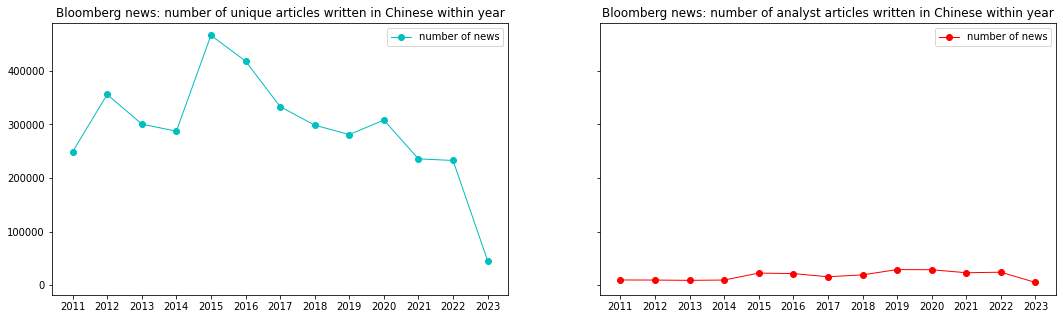

In [143]:
df1=pd.to_datetime(df.date).dt.year.value_counts().sort_index()
df2=pd.to_datetime(df_a.date).dt.year.value_counts().sort_index()
plot_two_figures(df1,df2,sharey=True,distribution='year')

**Distribution over week**

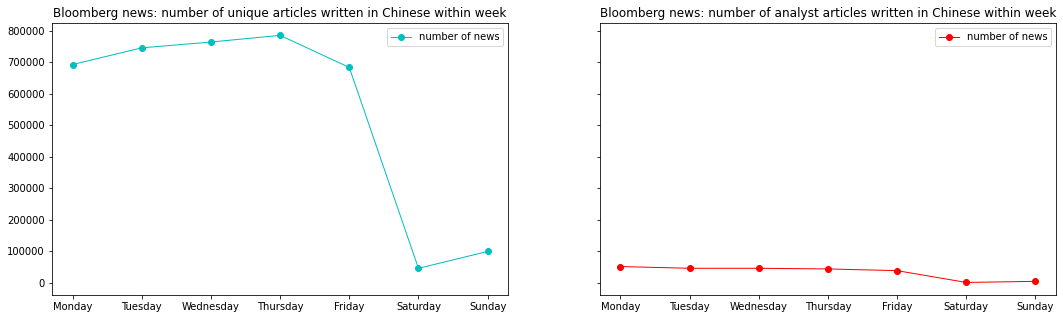

In [132]:
df1=pd.to_datetime(df.date).dt.weekday.value_counts().sort_index()
df2=pd.to_datetime(df_a.date).dt.weekday.value_counts().sort_index()
plot_two_figures(df1, df2,distribution='week')

**Distribution over months**

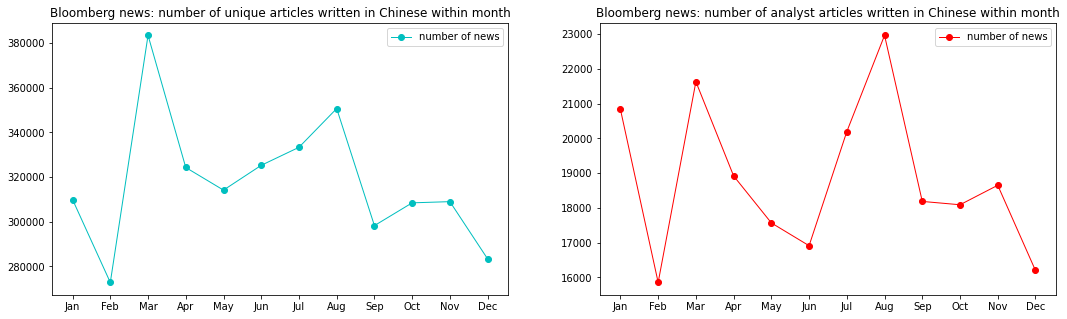

In [155]:
df1=pd.to_datetime(df.date).dt.month.value_counts().sort_index()
df2=pd.to_datetime(df_a.date).dt.month.value_counts().sort_index()
plot_two_figures(df1, df2,distribution='month',sharey=False)

**Distribution over quarters**

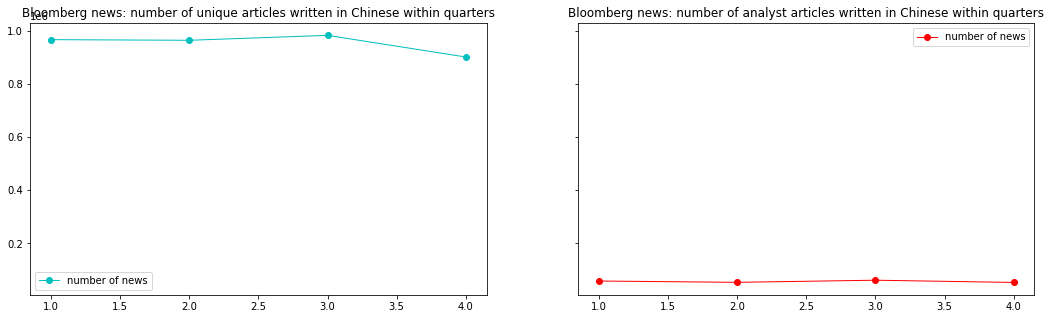

In [135]:
df1=pd.to_datetime(df.date).dt.quarter.value_counts().sort_index()
df2=pd.to_datetime(df_a.date).dt.quarter.value_counts().sort_index()
plot_two_figures(df1,df2,distribution='quarters')

**Distribution over 5 mins**

In [136]:
def distribution_5min(df, timezone=None):
    """
    A help function for average over the 5min time sequence
    
    Parameters:
    -----------
    df : the dataframe 
    timezone : The timezone to be converted to. 
        For example: 'Asia/Shanghai' 

    Returns:
    --------
    An aggregated pandaSeries group by 5 mins frequency. 
    
    """
    if timezone: 
        
        df['market_time']=pd.to_datetime(df['last_update']).dt.tz_localize('UTC').dt.tz_convert(timezone)
        df=df.set_index(df['market_time']).groupby(pd.Grouper(freq='5min')).size().reset_index()
        df=df.groupby(df.market_time.dt.time).mean()
    return df

/opt/tmp/tmp/ipykernel_132740/1104208176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['market_time']=pd.to_datetime(df['last_update']).dt.tz_localize('UTC').dt.tz_convert(timezone)


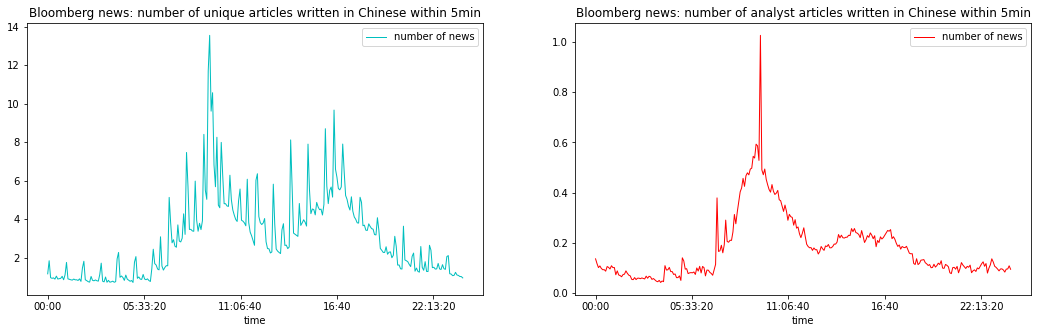

In [137]:
timezone= 'Asia/Shanghai'
df1=distribution_5min(df, timezone=timezone)
df2=distribution_5min(df_a, timezone=timezone)

plot_two_figures(df1,df2,marker=None,sharey=False,distribution='5min')

/opt/tmp/tmp/ipykernel_132740/1104208176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['market_time']=pd.to_datetime(df['last_update']).dt.tz_localize('UTC').dt.tz_convert(timezone)


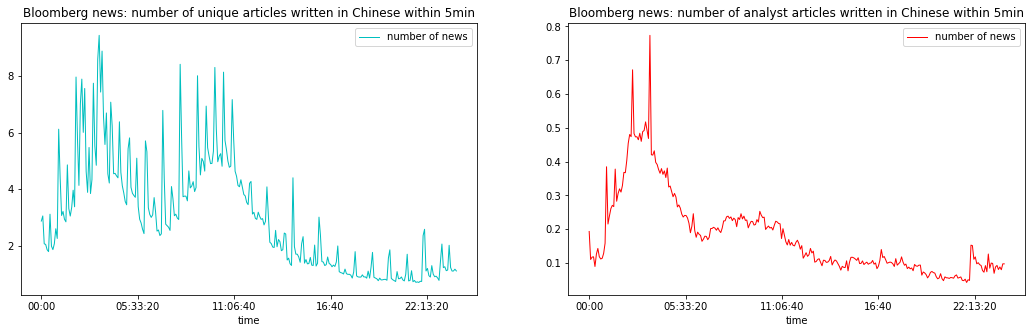

In [138]:
timezone= 'Europe/Berlin'
df1=distribution_5min(df, timezone=timezone)
df2=distribution_5min(df_a, timezone=timezone)

plot_two_figures(df1,df2,marker=None,sharey=False,distribution='5min')

/opt/tmp/tmp/ipykernel_132740/1104208176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['market_time']=pd.to_datetime(df['last_update']).dt.tz_localize('UTC').dt.tz_convert(timezone)


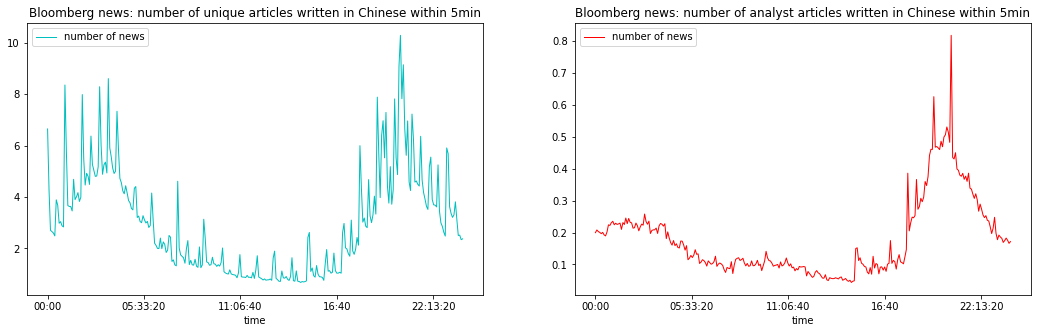

In [139]:
timezone= 'US/Central'
df1=distribution_5min(df, timezone=timezone)
df2=distribution_5min(df_a, timezone=timezone)

plot_two_figures(df1,df2,marker=None,sharey=False,distribution='5min')

#### Distribution over market open hours

Here we want to evaluate the distribution of news over the market hour, we define three kind of time intervals: 
* before market open time: from midnight to local market open time
* between market open time: from local market open time to local market close time
* after market open time: from local market close time to local market open time 

In [20]:
def market_hours(df, market_open_time, market_close_time, timezone):
    """
    Add a column to a DataFrame by market open hours and out-of-market open hours based on a given time zone.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The DataFrame to be aggregated.
    market_open_time : datetime.time
        The time when the market opens in the specified timezone.
    market_close_time : datetime.time
        The time when the market closes in the specified timezone.
    timezone : str
        The timezone in which the market opens and closes.
    
    Returns:
    --------
    A DataFrame with a supplementary column which indicates within market hours or not:
    - 1: After market close hour.
    - 0: Between market open and market close hour.
    - -1: Before market open hour.
    """
    # Convert datetime column to timezone-aware datetime object
    df['market_time'] = pd.to_datetime(df['last_update']).dt.tz_localize('UTC').dt.tz_convert(timezone) 
    
    # create a new column named market_hour by condition
    
    df['market_hour'] = -1+(df['market_time'].dt.time > market_open_time)+ (df['market_time'].dt.time > market_close_time)
    
#     # create a condition that checks if datetime_col is between midnight and market_open_time
#     condition_before = (df['market_time'].dt.time >= pd.to_datetime('00:00:00').time()) & (df['market_time'].dt.time < market_open_time)
#     # create a condition that checks if datetime_col is between market_close_time and midnight
#     condition_between =(df['market_time'].dt.time >= market_open_time) & (df['market_time'].dt.time <= market_close_time)
    
#     # set the values of market_hour based on the condition
#     df.loc[condition_before, 'market_hour'] = -1
#     df.loc[condition_between, 'market_hour'] = 0
    
    return df

In [74]:
def aggregate_market_hour(df, groupby_option):
    """
    Aggregates a dataframe by the column market_time using the specified groupby_option
    and also by market hours using the conditional column market_hours.
    The groupby_option can be one of 'year', 'week', or 'month'.
    Returns the aggregated dataframe.
    """
    if groupby_option == 'year':
        grouper = df.market_time.dt.year
    elif groupby_option == 'week':
        grouper = df.market_time.dt.weekday
    elif groupby_option == 'month':
        grouper = df.market_time.dt.month
    else:
        raise ValueError("Invalid groupby_option. Choose one of 'year', 'week', or 'month'.")
        
    aggregated_df = df.groupby([grouper,'market_hour']).size().unstack(level='market_hour')
    
    return aggregated_df

In [153]:
def plot_market_hour (df1, df2, market_open_time, market_close_time, timezone, distribution):
    """
    A help function which combiens three functions: market_hours, aggregate_market_hour,plot_two_figures
    Returns the plot of the figures based on different timezone and market hour. 
    """
    df_1 = market_hours(df1, market_open_time, market_close_time, timezone)
    df_2 = market_hours(df2, market_open_time, market_close_time, timezone)
    df_1=aggregate_market_hour(df_1, distribution)
    df_2=aggregate_market_hour(df_2, distribution)
    plot_two_figures(df_1, df_2,sharey=False,marker="o",distribution=distribution,market_hour=True)

/opt/tmp/tmp/ipykernel_132740/4237202745.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['market_time'] = pd.to_datetime(df['last_update']).dt.tz_localize('UTC').dt.tz_convert(timezone)
/opt/tmp/tmp/ipykernel_132740/4237202745.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['market_hour'] = 1
/home/yzhong/conda/envs/python_env_for_my_own_project/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

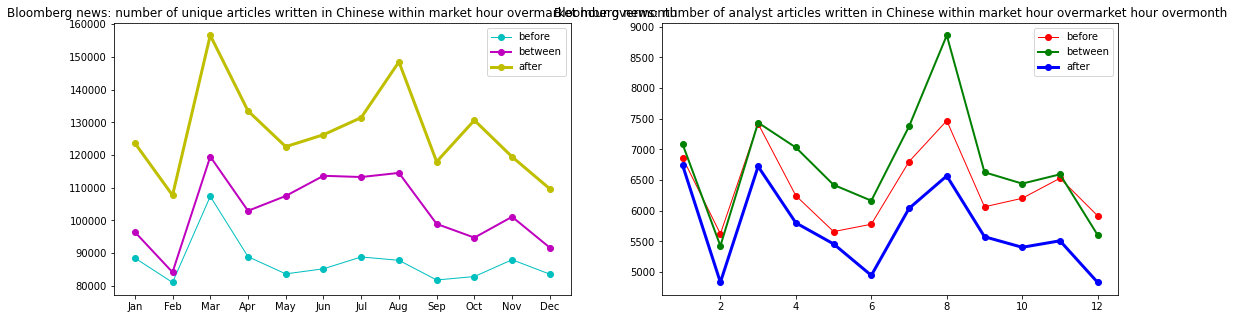

In [154]:
market_open_time = time(9, 30)
market_close_time = time(15, 0)
timezone = 'Asia/Shanghai'
plot_market_hour(df_m, df_a_m,market_open_time, market_close_time, timezone,distribution='month')

## Analysis over filtred news

**Create a dataframe that have additional columns for each column**

In [50]:
df_c=df.copy(deep=True)
mask1=find_star(df_c)
mask2=find_words(df_c)
df_c['contains_star']=mask1
df_c['contains_words']=mask2
df_c['Only_Ch']= (~mask1) & (~mask2)

In [52]:
df_c.head()

,suid,last_update,language,analyst,date,headline,body,market_time,market_hour,contains_star,contains_words,Only_Ch
0,LJ6A6D6K50Y9,2011-04-05 09:25:25.472,CHINESE_TRAD,False,2011-04-05,*OECD的PADOAN稱ECB將加息將不會顯著影響經濟成長,--LUDI WANG\n\n-0- Apr/05/2011 09:25 GMT\n,2011-04-05 17:25:25.472000+08:00,1,True,False,False
1,LJ6PWN6JIJVU,2011-04-05 15:05:11.901,CHINESE_SIMP,False,2011-04-05,彭博要闻,\n下列为彭博今日要闻:\n\n商业\n1. 美联储主席伯南克说如果通胀持续上升 美联储将...,2011-04-05 23:05:11.901000+08:00,1,False,True,False
2,LJ7FJD1A74E9,2011-04-06 00:18:49.543,CHINESE_TRAD,True,2011-04-06,摩根大通上調印度和中國股票評級 下調香港股票評級,\n(更多新聞請點閱{TOP CT <GO>} {NH HBN <GO>})\n\n記者 S...,2011-04-06 08:18:49.543000+08:00,-1,False,True,False
3,LJ7GAQ0UQVI9,2011-04-06 00:35:14.312,CHINESE_SIMP,False,2011-04-06,中国社科院研究员:今年通胀压力可能继续增强,\n(更多新闻请点阅{TOP CS <GO>} {NH CBN <GO>})\n\n彭博新闻...,2011-04-06 08:35:14.312000+08:00,-1,False,True,False
4,LJ7HVA6TTDTS,2011-04-06 01:09:10.927,CHINESE_SIMP,True,2011-04-06,"*高盛维持中国重汽的中性评级 :3808 HK, M...",--KEAN ZHANG\n\n-0- Apr/06/2011 01:09 GMT\n,2011-04-06 09:09:10.927000+08:00,-1,True,False,False


**Create functions for groupby patterns**

In [53]:
def Groupby_pattern (df, pattern):
    # group the data by year and pattern
    year=pd.to_datetime(df.date).dt.year
    if pattern == 'language': 
        col='language'        
    else:  
        if pattern == 'star':
            col='contains_star'
        if pattern == 'Key words':
            col='contains_words'   
        if pattern =='Only chinese versions':
            col='Only_Ch'
    
    grouped = df.groupby([year, col]).size().reset_index(name="count")
    # calculate the total count for each year
    year_totals = grouped.groupby("date")["count"].sum()
    # calculate the percentage of each category for each year
    grouped["percentage"] = grouped.apply(lambda row: row["count"] / year_totals[row["date"]] * 100, axis=1)
    # create separate dataframes for each cat.
    if pattern == 'language': 
        cat_1 = grouped[grouped["language"] == "CHINESE_SIMP"]
        cat_2 = grouped[grouped["language"] == "CHINESE_TRAD"]
        label1="Chinese Simplified"
        label2="Chinese Traditional"
    else: 
        cat_1 = grouped[grouped[col] == True]
        cat_2 = grouped[grouped[col] == False]
        label1 = f'News with {pattern}'
        label2= "The rest"
    
    #plot the data
    fig, ax = plt.subplots()

    ax.bar(cat_1['date'], cat_1["percentage"], label=label1)
    ax.bar(cat_2['date'], cat_2["percentage"], bottom=cat_1["percentage"], label=label2)

    ax.set_xlabel("Year")
    ax.set_ylabel("Percentage")
    ax.set_title(f"Percentage of news of pattern {pattern} over years")
    ax.legend()

    plt.show()

    

### Portion distribution of Chinese news

**In seperate graphs**

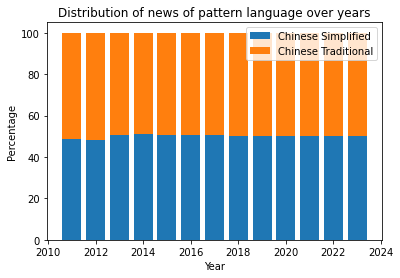

In [78]:
Groupby_pattern (df_c, pattern='language')

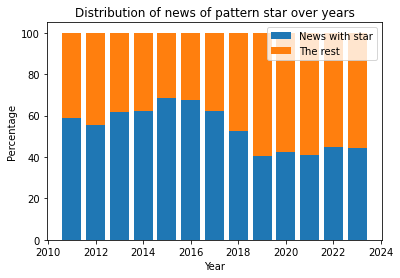

In [79]:
Groupby_pattern (df_c, pattern='star')

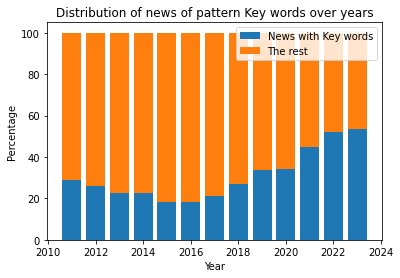

In [81]:
Groupby_pattern (df_c, pattern='Key words')

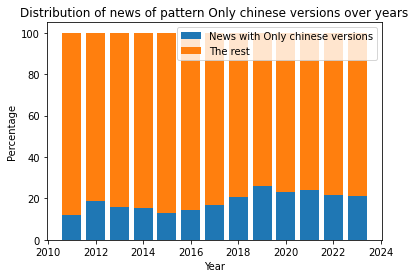

In [82]:
Groupby_pattern (df_c, pattern='Only chinese versions')

**In single graph**

In [54]:
def group_percentage (df, mask=False):
    year=pd.to_datetime(df.date).dt.year
    if mask:
        grouped=df.groupby([year, "language",mask]).size().reset_index(name="count")
    else:     
        grouped = df.groupby([year, "language"]).size().reset_index(name="count")
    year_totals = grouped.groupby('date')["count"].sum()
    grouped["percentage"] = grouped.apply(lambda row: row["count"] / year_totals[row["date"]] * 100, axis=1)
    return grouped

/opt/tmp/tmp/ipykernel_427859/2600844466.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])
/opt/tmp/tmp/ipykernel_427859/2600844466.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])
/opt/tmp/tmp/ipykernel_427859/2600844466.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

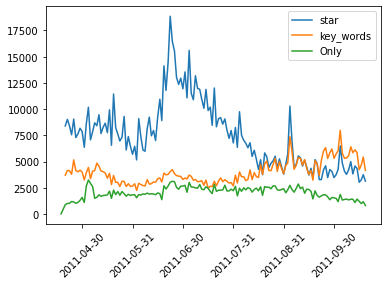

In [227]:
patterns=['star','key_words','Only']
groupes=[group_df ('star', freq='month'),group_df ('key_words', freq='month'),group_df ('Only', freq='month')]
# grouped1=group_df ('star', freq='month')
# grouped2=group_df ('key_words', freq='month')
# grouped3=group_df ('Only', freq='month')
for i,group in enumerate(groupes): 
    plt.plot(group['date'], group['count'], label=patterns[i])
labels = group.date.dt.strftime('%Y-%m-%d').tolist()
plt.xticks(rotation=45)
plt.gca().set_xticklabels(labels)
plt.legend()
plt.show()


In [56]:
grouped1=group_percentage(df_c)
# create separate dataframes for each language
chinese_simp = grouped1[grouped1["language"] == "CHINESE_SIMP"]
chinese_tra = grouped1[grouped1["language"] == "CHINESE_TRAD"]
mask='Only_Ch'
grouped2=group_percentage(df_c,mask)
chinese_simp_m = grouped2[(grouped2["language"] == "CHINESE_SIMP") & (grouped2[mask]==True)]
chinese_tra_m = grouped2[(grouped2["language"] == "CHINESE_TRAD")& (grouped2[mask]==True)]

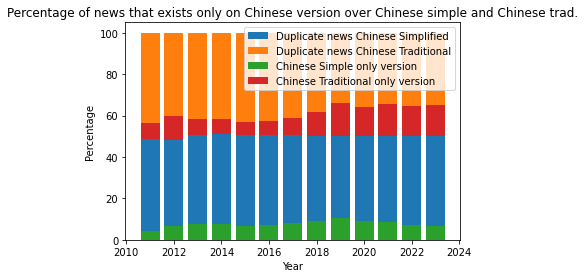

In [57]:
# plot the data
fig, ax = plt.subplots()

ax.bar(chinese_simp['date'], chinese_simp["percentage"], label="Duplicate news Chinese Simplified")
ax.bar(chinese_tra['date'], chinese_tra["percentage"], bottom=chinese_simp["percentage"], label="Duplicate news Chinese Traditional")
ax.bar(chinese_simp_m['date'], chinese_simp_m["percentage"] , label="Chinese Simple only version")
ax.bar(chinese_tra_m['date'], chinese_tra_m["percentage"], bottom=chinese_simp["percentage"], label="Chinese Traditional only version")

ax.set_xlabel("Year")
ax.set_ylabel("Percentage")
ax.set_title("Percentage of news that exists only on Chinese version over Chinese simple and Chinese trad.")
ax.legend()

plt.show()

### Sum distributions over different date points

**Create three different dataframe based on the pattern for facilitating the plot**

Look only into the Chinese simplified data

In [63]:
def group_df (df, pattern, freq='month'):
    if pattern == 'star':
        col='contains_star'
        title = f'Counts of Ch_simp news with {pattern} per month'
    if pattern == 'key_words':
        col='contains_words'
        title = f'Counts of Ch_simp news with {pattern} per month'
    if pattern == 'Only':
        col='Only_Ch'
        title = f'Counts of Ch_simp news with {pattern} Chinese version per month'
    df["date"] = pd.to_datetime(df["date"])
    
    if freq=='month':
        grouper=pd.Grouper(key='date', freq='M')
    grouped=df.groupby([grouper,col]).size().reset_index(name="count")
    grouped=grouped[grouped[col]==True]
    
    return grouped

/opt/tmp/tmp/ipykernel_408336/3662858279.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels)


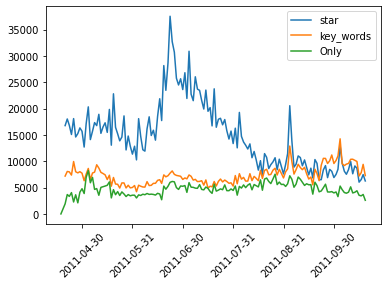

In [64]:
patterns=['star','key_words','Only']
groupes=[group_df (df_c, 'star', freq='month'),group_df (df_c,'key_words', freq='month'),group_df (df_c,'Only', freq='month')]
# grouped1=group_df ('star', freq='month')
# grouped2=group_df ('key_words', freq='month')
# grouped3=group_df ('Only', freq='month')
for i,group in enumerate(groupes): 
    plt.plot(group['date'], group['count'], label=patterns[i])
labels = group.date.dt.strftime('%Y-%m-%d').tolist()
plt.xticks(rotation=45)
plt.gca().set_xticklabels(labels)
plt.legend()
plt.show()

In [220]:
def group_sum (pattern, freq='month'):
    
    if pattern == 'star':
        df=df_star_s
        title = f'Counts of Ch_simp news with {pattern} per month'
    if pattern == 'key_words':
        df=df_key_s
        title = f'Counts of Ch_simp news with {pattern} per month'
    if pattern == 'Only':
        df=df_only_s
        title = f'Counts of Ch_simp news with {pattern} Chinese version per month'
    df["date"] = pd.to_datetime(df["date"])
    
    if freq=='month':
    
        grouper=pd.Grouper(key='date', freq='M')
    grouped=df.groupby([grouper,"mask"]).size().reset_index(name="count")
    grouped=grouped[grouped['mask']==True]
    
    
    labels = grouped.date.dt.strftime('%Y-%m-%d').tolist()
    # plot the counts
    plt.plot(grouped['date'],grouped['count'])
    plt.xticks(rotation=45)
    plt.gca().set_xticklabels(labels)
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(title)
    plt.show()

#     grouped=df.groupby([grouper,"mask"]).size().reset_index(name="count")
#     return grouped[grouped['mask']==True]

/opt/tmp/tmp/ipykernel_427859/4242054988.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])
/opt/tmp/tmp/ipykernel_427859/4242054988.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels)


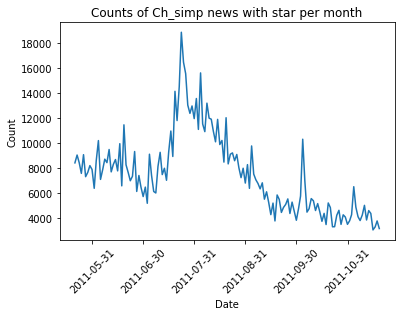

In [221]:
group_sum ('star', freq='month')

/opt/tmp/tmp/ipykernel_427859/4242054988.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])
/opt/tmp/tmp/ipykernel_427859/4242054988.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels)


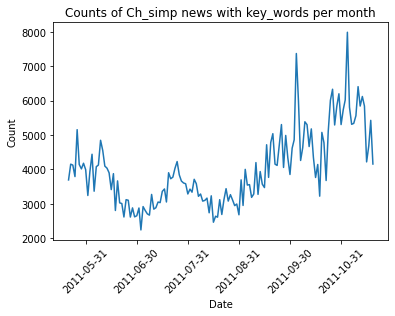

In [222]:
group_sum ('key_words', freq='month')

/opt/tmp/tmp/ipykernel_427859/4242054988.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])
/opt/tmp/tmp/ipykernel_427859/4242054988.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels)


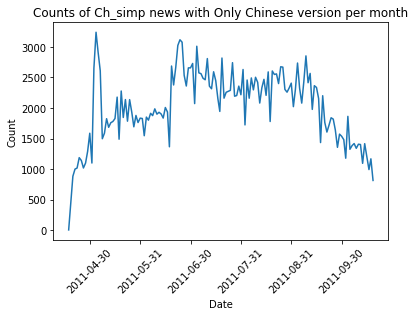

In [224]:
group_sum ('Only', freq='month')

In [178]:
tickles = grouped.date.dt.strftime('%Y-%m-%d').tolist()

In [184]:
range(len(tickles))

range(0, 24)

In [ ]:
# plot the counts
loc=range(len(tickles))
labels= grouped.date.dt.strftime('%Y-%m-%d').tolist()

plt.plot(grouped['date'],grouped['count'])

plt.xticks(rotation=45)
plt.gca().set_xticklabels(labels)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Counts of True values per month')
plt.show()

In [ ]:
fig, ax = plt.subplots()
loc=range(len(tickles))
labels= grouped.date.dt.strftime('%Y-%m-%d').tolist()
ax.plot(grouped['date'],grouped['count'])
ax.set_xticks(loc)
ax.set_xticklabels(labels, rotation='vertical')
plt.show()

In [168]:
grouped

,date,mask,count
0,2011-04-30,True,2
3,2012-02-29,True,1
5,2012-06-30,True,1
6,2012-08-31,True,2
7,2012-10-31,True,1
8,2012-11-30,True,1
10,2013-09-30,True,1
11,2014-01-31,True,1
12,2014-04-30,True,1
15,2015-01-31,True,1


## Exploration of headline contents

In [5]:
df_test=df.sample(2000)

In [8]:
with open('body.txt', 'w') as f:
    for row in df_test.itertuples():
        f.write(str(row.last_update) + '\n')
        f.write(str(row.analyst) + '\n')
        f.write(str(row.language) + '\n')
        f.write(f'    {row.body}' + '\n')

In [9]:
with open('body_headline.txt', 'w') as f:
    for row in df_test.itertuples():
        f.write(str(row.last_update) + '\n')
        f.write(str(row.analyst) + '\n')
        f.write(str(row.language) + '\n')
        f.write(f' ****{row.headline}' + '\n')
        f.write(f'    {row.body}' + '\n')

In [158]:
with open('headline.txt', 'w') as f:
    for row in df_test.itertuples():
        f.write(str(row.last_update) + '\n')
        f.write(str(row.analyst) + '\n')
        f.write(str(row.language) + '\n')
        f.write(f'    {row.headline}' + '\n')

## Statistical plot over headline

### Data cleaning

**Basics**
The following functions will: 
* remove space and '...'
* Only keeping chinese, english and numbers
* Turn traditional chinese into simplified chinese

In [6]:
#remove space
def remove_symbols(text):
    text=text.replace(' ','')
    text =text.replace('...',',') 
    
    return text

In [7]:
#remove useless characters
def clear_character(text):    
    pattern = re.compile("[^\u4e00-\u9fa5^a-z^A-Z^0-9]") 
    #only keep chinese, enlish and numbers
    line=re.sub(pattern,'',text) 
    new_text=''.join(line.split())    
    return new_text

In [8]:
#Full-width to half-width
def full_to_half(sentence):      
    change_sentence=""
    for word in sentence:
        inside_code=ord(word)
        if inside_code==12288:    #Direct conversion of full-width spaces
            inside_code=32
        elif inside_code>=65281 and inside_code<=65374:  #Full-width characters (except spaces) are converted according to the relationship
            inside_code-=65248
        change_sentence+=chr(inside_code)
    return change_sentence

In [9]:
def hant_2_hans(text):
    '''
    Function: Traditional chinese to simplified chinese
    '''
    return zhconv.convert(text, 'zh-hans')

In [ ]:
def Process_clean(df):
    df.loc[:,"headline"] = df.headline.apply(lambda x: hant_2_hans(x))
    df.loc[:,"headline"] = df.headline.apply(lambda x: full_to_half(x))
    

In [10]:
df.loc[:,"headline"] = df.headline.apply(lambda x: hant_2_hans(x))

In [214]:
df["headline"][75896]

'中烟香港全年净利润3749亿港元'

In [ ]:
import jieba

 
#全模式
jieba_list = jieba.cut(txt,cut_all=True)
jieba_txt1 = ' '.join(jieba_list)
print('全模式分词：',jieba_txt1)
 
#精准模式
jieba_list = jieba.cut(txt, cut_all=False)
jieba_txt2 = ' ' .join(jieba_list)
print('精准模式分词：',jieba_txt2)

In [ ]:
#中文分词
def cut_word(text):
    # 精准模式
    jieba_list = jieba.cut(text, cut_all=False)
    return jieba_txt

In [ ]:
def seg_sentence(list_txt):
    #读取停用词表
    stopwords = stopwords = read_txt('哈工大停用词表.txt')
    seg_txt = [ w for w in list_txt if w not in stopwords]
    return seg_txt

In [ ]:
#TF_IDF计算
def tf_idf(txt):
    corpus_txt = [' '.join(txt)]
    stopword_list = read_txt(r'哈工大停用词表.txt').splitlines()
    vector = TfidfVectorizer(stop_words=stopword_list)
    tfidf = vector.fit_transform(corpus_txt)
    print(tfidf)
    # 获取词袋模型中的所有词
    wordlist = vector.get_feature_names()  
    # tf-idf矩阵 元素a[i][j]表示j词在i类文本中的tf-idf权重
    weightlist = tfidf.toarray()
    # 打印每类文本的tf-idf词语权重，第一个for遍历所有文本，第二个for便利某一类文本下的词语权重
    for i in range(len(weightlist)):
        print("-------第", i, "段文本的词语tf-idf权重------")
        for j in range(len(wordlist)):
            print(wordlist[j], weightlist[i][j]  )

### Remove useless symbols

In [26]:
#remove space
def remove_symbols(text):
    text=text.replace(' ','')
    
    return text

In [17]:
df_test=df.head(5)

In [28]:
df.loc[:,"body"] = df.body.apply(lambda x: remove_symbols(x))

In [29]:
df['body'][5000]

'--KELLYLI\n\n-0-Sep/11/201206:18GMT\n'

In [47]:
df['body'][5000]

'--KELLY LI\n\n-0- Sep/11/2012 06:18 GMT\n'

### Words distributions

### Simple analysis

In [7]:
df_b.head()

,suid,last_update,language,analyst,date,headline,body
0,MFYYSI6JTSE8,2013-01-01 23:05:06.657,CHINESE_TRAD,False,2013-01-01,更新:亞洲盤前簡報:新加坡GDP、印尼貿易數據,\n記者 Steven McPherson、Margo Towie\n1月2日【彭博】-- ...
1,MFXA8F6K50Y2,2013-01-01 01:17:03.388,CHINESE_SIMP,False,2013-01-01,*张立群:中国经济正在向7%-8%之间的平稳增长区间过渡,--KELLY LI\n\n-0- Jan/01/2013 01:17 GMT\n
2,MFZ0JN0UQVI9,2013-01-01 23:42:59.638,CHINESE_SIMP,False,2013-01-01,中国11月宏观经济景气指数 (表),\n记者 Bloomberg News\n 1月2日【彭博】-- 以下是由中国经济景...
3,MFZ0EX1A1I4H,2013-01-01 23:40:09.368,CHINESE_TRAD,False,2013-01-01,美國眾議院共和黨人反對參議院通過的預算議案 擬增加減支內容,\n(更多新聞請點閱{TOP CT <GO>} {NH HBN <GO>})\n\n記者:R...
4,MFX9HL3PWT1E,2013-01-01 01:00:57.561,CHINESE_TRAD,False,2013-01-01,*中國12月份製造業採購經理指數(PMI)報50.6,\n-0- Jan/01/2013 01:00 GMT\n


## Archive

In [85]:
def quarterly_counts(df_test):
    df_test['date'] = pd.to_datetime(df_test['date'])
    # add column for quarter
    df_test['day'] = df_test['date'].dt.quarter

    # add column for year
    df_test['year'] = df_test['date'].dt.year

    # group by quarter and year, then count rows
    quarterly_counts = df_test.groupby(['year', 'quarter']).size().to_frame()

    def rename_column(df):
    # get the current column names
        columns = df.columns
    # create a dictionary with the new column names
        new_names = dict(zip(columns, columns))
        new_names[columns[-1]] = 'number of news'
    # rename the columns using the dictionary
        df.rename(columns=new_names, inplace=True)
        return df

    rename_column(quarterly_counts)
    return quarterly_counts

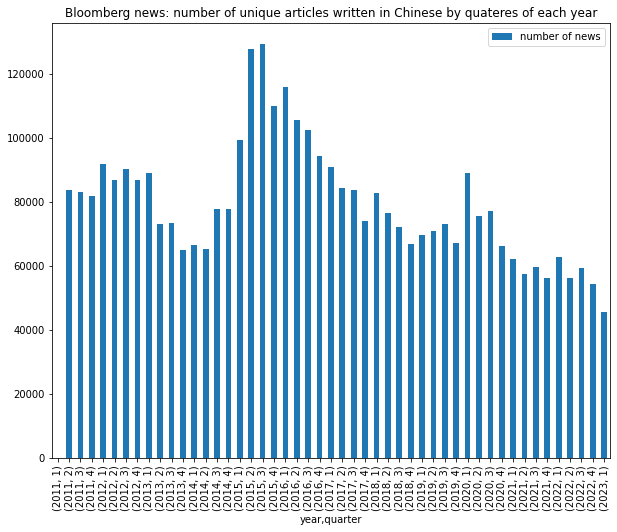

In [147]:
ax=df_q.plot(title='Bloomberg news: number of unique articles written in Chinese by quateres of each year',kind='bar')
ax.set_xticklabels(df_q.index.tolist(), rotation=90)
ax.figure.set_size_inches(10,8)
plt.show()

## B. Refinitiv news

Takes about 5 mins to load. Contains only 166k articles.

In [8]:
%%time
dastart = pd.to_datetime("2005/01/01")

df_r = dap.read_parquet(
    'REFINITIV_NEWS_FEATURES_CLEAN_NEWS',
    filters=[[
        ('date', '>=', dastart),
        ('language', '=', 'ZH'),
        ('complex_news', '=', False),
        ('last_version', '=', True),
        ('trading_alerts', '=', False)
    ]],
    columns = [
        'id', 'date', 'timestamp', 'headline', 'body'
    ]
)

CPU times: user 3min 39s, sys: 1min 41s, total: 5min 20s
Wall time: 4min 1s


In [10]:
print(df_r.shape)

(167140, 5)


In [11]:
df_r.head()

,id,date,timestamp,headline,body
0,20050104-050149000-nCT0964075-1-1,2005-01-04,2005-01-04 05:01:49.194000+00:00,"韓國稱預期2005年貿易順差為280億美元,2004年為298億美元",
1,20050104-050548000-nCT0964076-2-1,2005-01-04,2005-01-04 05:05:47.912000+00:00,"韓國預期2005年外國直接投資計畫為110億美元,2004年為128億",
2,20050104-052728000-nCT0964073-5-1,2005-01-04,2005-01-04 05:27:28.319000+00:00,韓圜兌美元升值為韓國出口最大問題--韓國產業資源部長官,
3,20050104-060945000-nCT0964049-1-1,2005-01-04,2005-01-04 06:09:44.605000+00:00,台灣央行稱兩年期公債足額發行400億台幣,
4,20050104-155957000-nCN5566647-2-1,2005-01-04,2005-01-04 15:59:57.643000+00:00,"倫敦金屬交易所(LME)期銅跌至每噸2,890美元,因基金拋售",


<AxesSubplot:title={'center':'Refinitiv news: number of unique articles written in Chinese'}>

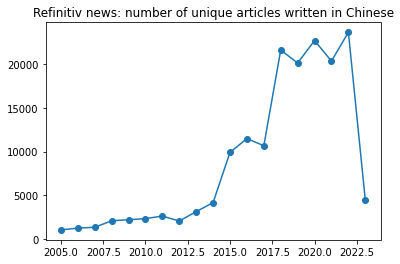

In [12]:
pd.to_datetime(df_r.date).dt.year.value_counts().sort_index().plot(title='Refinitiv news: number of unique articles written in Chinese', marker='o')

## C. Analyst reports

In [13]:
%%time
LANGUAGES = {
'Chinese' :  {'code':'zho', 'brokers': ['JPMorgan']},
'Japanese' : {'code':'jpn', 'brokers': ['JPMorgan', 'MorganStanley']},
}
asian_reports = {
language : {
    broker: pd.read_parquet(f'/mnt/research-live/it-data/data-analytics/analyst_reports/{broker}/flat_files/text.parquet')\
            .loc[lambda x:x.language == LANGUAGES[language]['code']].drop(columns=['filename', 'language', 'pages']).\
            rename(columns={'research_id':'id', 'dt':'date', 'publication_ts_utc':'timestamp'})
    for broker in LANGUAGES[language]['brokers']
    }
for language in LANGUAGES}

CPU times: user 1min 48s, sys: 1min 48s, total: 3min 36s
Wall time: 3min 23s


In [7]:
df_ar = asian_reports['Chinese']['JPMorgan']

In [8]:
print(df_ar.shape)

(317, 8)


In [9]:
df_ar.head()

,id,date,timestamp,title,abstract,synopsis,summary,doc_full_txt
535360,GPS-3284409-0,2020-03-23,2020-03-23 15:43:55+00:00,中国重汽,我们对中国重汽发起覆盖，给予减持评级，截至2020年12月的目标价11港元，反映我们有关重卡...,我们对中国重汽发起覆盖，给予减持评级，截至2020年12月的目标价11港元，反映我们有关重卡...,我们对中国重汽发起覆盖，给予减持评级，截至2020年12月的目标价11港元，反映我们有关重卡...,\n\n 中国 证券研究 2020 年 3 月 23 日 ▼ 减持 中国重汽 之前: 中性...
535372,GPS-3284687-0,2020-03-23,2020-03-23 15:36:19+00:00,广汇宝信,我们对广汇宝信发起覆盖，给予中性评级，截至2020年12月的目标价为1.1港元。宝信拥有成熟...,我们对广汇宝信发起覆盖，给予中性评级，截至2020年12月的目标价为1.1港元。宝信拥有成熟...,我们对广汇宝信发起覆盖，给予中性评级，截至2020年12月的目标价为1.1港元。宝信拥有成熟...,"\n\n 中国 证券研究 2020 年 3 月 23 日 广汇宝信 中性 1293.HK, ..."
535377,GPS-3289186-0,2020-03-23,2020-03-23 15:43:44+00:00,长安汽车 - A,我们发起对长安汽车－Ａ的覆盖，给予减持评级，截至2020年12月的目标价为9元。长安是福特在...,我们发起对长安汽车－Ａ的覆盖，给予减持评级，截至2020年12月的目标价为9元。长安是福特在...,我们发起对长安汽车－Ａ的覆盖，给予减持评级，截至2020年12月的目标价为9元。长安是福特在...,\n\n 中国 证券研究 2020 年 3 月 23 日 长安汽车 - A 减持 00062...
535385,GPS-3286452-0,2020-03-23,2020-03-23 15:37:21+00:00,东风汽车,我们发起对东风汽车的覆盖，给予中性评级，截至2020年12月的目标价为5.5港元。乐观来说，...,我们发起对东风汽车的覆盖，给予中性评级，截至2020年12月的目标价为5.5港元。乐观来说，...,我们发起对东风汽车的覆盖，给予中性评级，截至2020年12月的目标价为5.5港元。乐观来说，...,"\n\n 中国 证券研究 2020 年 3 月 23 日 东风汽车 中性 0489.HK, ..."
535433,GPS-3287529-0,2020-03-23,2020-03-23 15:39:13+00:00,上汽集团 - A,我们发起对上汽集团-A的覆盖，给予中性评级，截至2020年12月的目标价为22元。上汽目前是...,我们发起对上汽集团-A的覆盖，给予中性评级，截至2020年12月的目标价为22元。上汽目前是...,我们发起对上汽集团-A的覆盖，给予中性评级，截至2020年12月的目标价为22元。上汽目前是...,\n\n 中国 证券研究 2020 年 3 月 23 日 上汽集团 - A 中性 60010...


<AxesSubplot:title={'center':'JP Morgan analyst reports: number of unique articles written in Chinese'}>

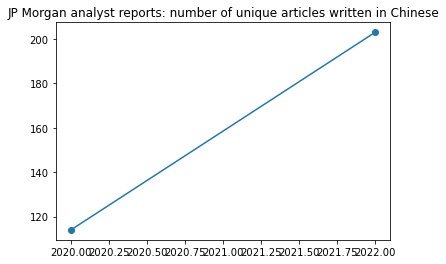

In [10]:
pd.to_datetime(df_ar.date).dt.year.value_counts().sort_index().plot(title='JP Morgan analyst reports: number of unique articles written in Chinese', marker='o')